In [ ]:
from dateutil.parser import parse 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})

In [ ]:
plt.style.use('fivethirtyeight')

In [ ]:
# Import as Dataframe
df = pd.read_csv('/content/coimbatore_2k_final.csv')
df.head(10)

,longitude,latitude
0,76.96292,10.85913
1,76.96898,10.86515
2,76.97412,10.86712
3,76.97384,10.86967
4,76.97903,10.87520
5,77.00087,10.88597
6,76.99979,10.89609
7,76.99398,10.89500
8,76.99112,10.89206
9,77.00072,10.98628


In [ ]:
ser = pd.read_csv('/content/coimbatore_2k_final.csv')
ser.head()

,longitude,latitude
0,76.96292,10.85913
1,76.96898,10.86515
2,76.97412,10.86712
3,76.97384,10.86967
4,76.97903,10.87520


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/MarketArrivals.csv')
df.size

102270

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(df.latitude,df.longitude,test_size=0.9,random_state=123)

In [ ]:
df.size

4702

In [ ]:
x_train.size

235

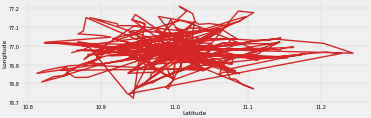

In [ ]:
import matplotlib.pyplot as plt
df = pd.read_csv('/content/coimbatore_2k_final.csv', index_col='latitude')

# Draw Plot
def plot_df(df, x, y, title="", xlabel='Latitude', ylabel='Longitude', dpi=25):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

plot_df(df, x=df.index, y=df.longitude)  

In [ ]:
x_train, x_test,y_train,y_test = train_test_split(df.index,df.longitude,test_size =0.95)
# print the data
x_train

Float64Index([10.99523, 11.02419, 11.02264, 10.96617, 11.01049, 11.03444,
              10.94953, 10.95991, 11.03164, 11.01777,
              ...
              11.01919, 11.04887,  10.9986, 10.89007, 11.01093, 10.97359,
              11.00262, 11.01344, 11.03245, 11.01628],
             dtype='float64', name='latitude', length=117)

In [ ]:
x_train.size

117

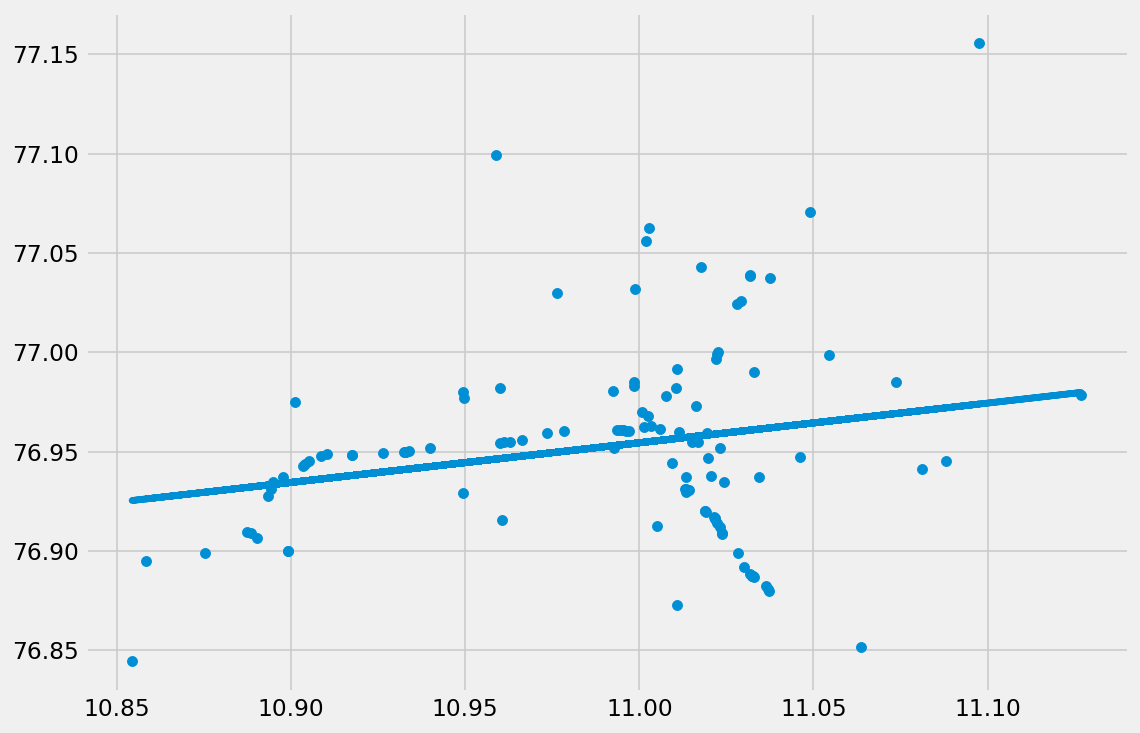

In [ ]:
# regression

import matplotlib.pyplot as plt
from scipy import stats

x = x_train
y = y_train

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

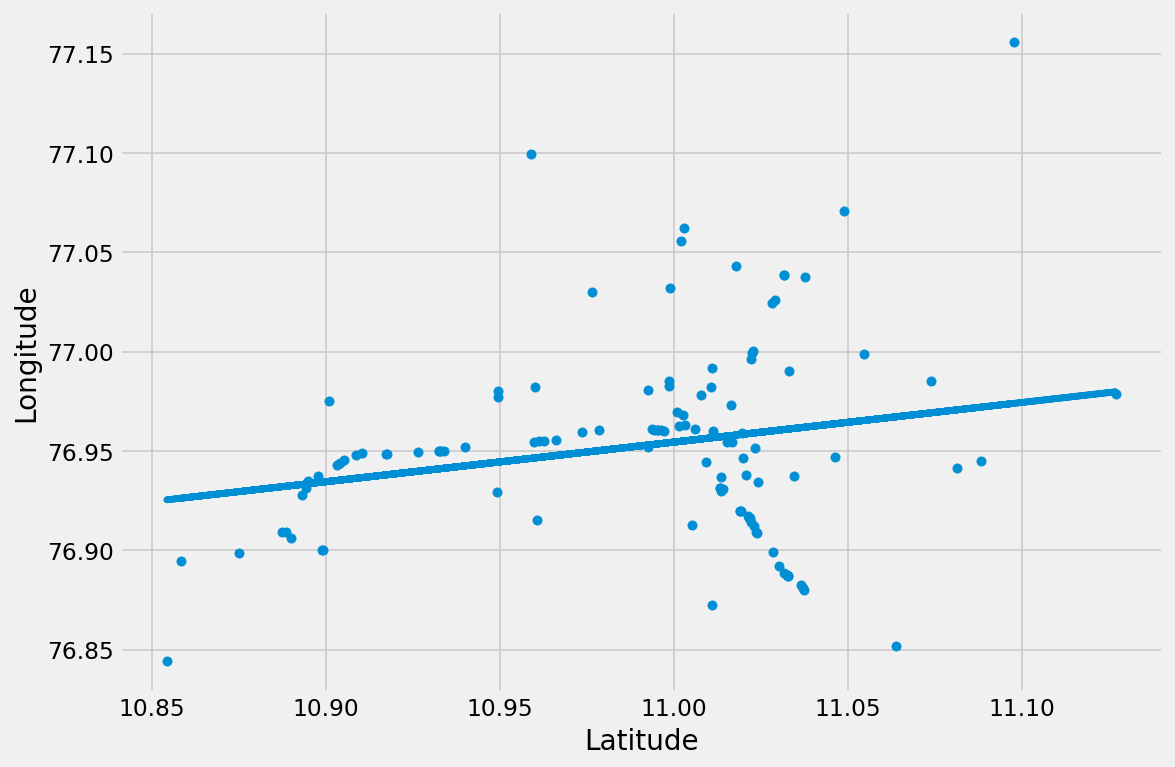

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def estimate_coef(x, y):
	# no of points
	n = np.size(x)

	# mean
	m_x = np.mean(x)
	m_y = np.mean(y)

	SS_xy = np.sum(y*x) - n * m_y * m_x
	SS_xx = np.sum(x*x) - n * m_x * m_x

	
	b_1 = SS_xy / SS_xx
	b_0 = m_y - b_1*m_x

	return (b_0, b_1)

def plot_regression_line(x, y, b):
	
	plt.scatter(x, y, s = 30)

	y_pred = b[0] + b[1]*x

	plt.plot(x, y_pred)

	plt.xlabel('Latitude')
	plt.ylabel('Longitude')


	plt.show()



x = x_train
y = y_train

b = estimate_coef(x, y)


plot_regression_line(x, y, b)



In [ ]:
# Root mean squared error

import math
y_actual = x_train
y_predicted = y_train
 
MSE = np.square(np.subtract(y_actual,y_predicted)).mean() 
 
RMSE = math.sqrt(MSE)
print("Root Mean Square Error:\n")
print(RMSE)

Root Mean Square Error:

65.96267795456038
